In [3]:
import  math
import numpy as np
import lhapdf
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [4]:
datadir="/Users/johannes/Dropbox/lh_2017_NNLO_COMP_Bellm/data/"

NNLOJET_03_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_LO_3.yoda")
NNLOJET_04_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_LO_3.yoda")
NNLOJET_05_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_LO_3.yoda")
NNLOJET_07_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_LO_3.yoda")
NNLOJET_10_LO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_LO_3.yoda")

NNLOJET_03_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_NLO_3.yoda")
NNLOJET_04_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_NLO_3.yoda")
NNLOJET_05_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_NLO_3.yoda")
NNLOJET_07_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_NLO_3.yoda")
NNLOJET_10_NLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_NLO_3.yoda")

NNLOJET_03_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_03_NNLO_3.yoda")
NNLOJET_04_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_04_NNLO_3.yoda")
NNLOJET_05_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_05_NNLO_3.yoda")
NNLOJET_07_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_07_NNLO_3.yoda")
NNLOJET_10_NNLO=yoda.readYODA(datadir+"NNLOJET/HJ/NNLOJET_10_NNLO_3.yoda")


H7_NLO_PS=yoda.readYODA(datadir+"Herwig/HJ/HJ-NLO-PS-C-HTo2withmass-ShowerWithout.yoda")
Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/Higgs/nlops.yoda")




In [5]:
xxx=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
xxx=[7,12,16,20,25,32,40]

xxx=[10,15,20,25,30,35,40,45]

def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[:50]
    xmaxs=np.array(yo[name].xMaxs())[:50]
    xmins=np.array(yo[name].xMins())[:50]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xVals())[:50]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[-1]]
    return np.array(res)
    
def ratioPLOTS_leadJet(FO,Matching,Merging,ax,fo_rescale,ratioto):
    x  =rebinx(FO[0],'/LH2017_ZHJETS/J1_pT_R03')
    y03=rebin(FO[0],'/LH2017_ZHJETS/J1_pT_R03')
    y04=rebin(FO[1],'/LH2017_ZHJETS/J1_pT_R04')
    y07=rebin(FO[2],'/LH2017_ZHJETS/J1_pT_R07')
    y10=rebin(FO[3],'/LH2017_ZHJETS/J1_pT_R10')

    y03_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R03')
    y04_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R04')
    y07_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R07')
    y10_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R10')

    y03_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R03')
    y04_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R04')
    y07_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R07')
    y10_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R10')
    
    if ratioToR07==True : 
        ratioto=y07
        fo_rescale=1.
    ax.set_xlim([30,530])
    ax.set_ylim([0.75,1.2])
    #ax.plot(x,y03*fo_rescale/ratioto,c="red",ls="-")
    ax.plot(x,y04*fo_rescale/ratioto,c="red",ls="--")
    ax.plot(x,y07*fo_rescale/ratioto,c="red",ls="-.")
    ax.plot(x,y10*fo_rescale/ratioto,c="red",ls=":")

    if ratioToR07==True : ratioto=y07_h7
    #ax.plot(x,y03_h7/ratioto,c="blue",ls="-")
    ax.plot(x,y04_h7/ratioto,c="blue",ls="--")
    ax.plot(x,y07_h7/ratioto,c="blue",ls="-.")
    ax.plot(x,y10_h7/ratioto,c="blue",ls=":")

    if ratioToR07==True : ratioto=y07_sh
    #ax.plot(x,y03_sh/ratioto,c="green",ls="-")
    ax.plot(x,y04_sh/ratioto,c="green",ls="--")
    ax.plot(x,y07_sh/ratioto,c="green",ls="-.")
    ax.plot(x,y10_sh/ratioto,c="green",ls=":")
    
    
    
    

    
    
def ratioPLOTS_BosonPT(FO,Matching,Merging,ax,fo_rescale,ratioto):
   
    x  =rebinx(FO[0],'/LH2017_ZHJETS/XpT')
    y03=rebin(FO[0],'/LH2017_ZHJETS/XpT')
    y04=rebin(FO[1],'/LH2017_ZHJETS/XpT')
    y07=rebin(FO[2],'/LH2017_ZHJETS/XpT')
    y10=rebin(FO[3],'/LH2017_ZHJETS/XpT')

    y03_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R03')

    y03_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R03')
    
    


    if ratioToR07==True : 
        ratioto=y07
        fo_rescale=1.
    
    #plt.semilogx()
    ax.set_xlim([30,530])
    ax.set_ylim([0.85,1.15])
    #ax.plot(x,y03*fo_rescale/ratioto,c="red",ls="-")
    ax.plot(x,y04*fo_rescale/ratioto,c="red",ls="--")
    ax.plot(x,y07*fo_rescale/ratioto,c="red",ls="-.")
    ax.plot(x,y10*fo_rescale/ratioto,c="red",ls=":")

    if ratioToR07==True : ratioto=y03_h7
    ax.plot(x,y03_h7/ratioto,c="blue",ls=":")

    if ratioToR07==True : ratioto=y03_sh
    ax.plot(x,y03_sh/ratioto,c="green",ls=":")
    
    

def dummyForLegend(FO,Matching,Merging,ax):
    x  =rebinx(FO[0],'/LH2017_ZHJETS/J1_pT_R03')
    y03=rebin(FO[0],'/LH2017_ZHJETS/J1_pT_R03')
    y04=rebin(FO[1],'/LH2017_ZHJETS/J1_pT_R04')
    y07=rebin(FO[2],'/LH2017_ZHJETS/J1_pT_R07')
    y10=rebin(FO[3],'/LH2017_ZHJETS/J1_pT_R10')

    y03_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R03')
    y04_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R04')
    y07_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R07')
    y10_h7=rebin(Matching,'/LH2017_ZHJETS_H/J1_pT_R10')

    y03_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R03')
    y04_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R04')
    y07_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R07')
    y10_sh=rebin(Merging,'/LH2017_ZHJETS/J1_pT_R10')

    #plt.semilogx()
    
    ratioto=1.
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    #ax.plot(x,y03/ratioto,c="red",ls="-",label="FO R=0.3")
    ax.plot(x,y04/ratioto,c="red",ls="--",label="FO R=0.4")
    ax.plot(x,y07/ratioto,c="red",ls="-.",label="FO R=0.7")
    ax.plot(x,y10/ratioto,c="red",ls=":",label="FO R=1.0")

    #ax.plot(x,y03_h7/ratioto,c="blue",ls="-",label="H7 NLO $\oplus$ PS R=0.3")
    ax.plot(x,y04_h7/ratioto,c="blue",ls="--",label="NLO $\oplus$ PS (Herwig7) R=0.4")
    ax.plot(x,y07_h7/ratioto,c="blue",ls="-.",label="NLO $\oplus$ PS (Herwig7) R=0.7")
    ax.plot(x,y10_h7/ratioto,c="blue",ls=":",label="NLO $\oplus$ PS (Herwig7) R=1.0")

    #ax.plot(x,y03_sh/ratioto,c="green",ls="-",label="Sherpa MEPS@NLO R=0.3")
    ax.plot(x,y04_sh/ratioto,c="green",ls="--",label="S-MC@NLO (Sherpa) R=0.4")
    ax.plot(x,y07_sh/ratioto,c="green",ls="-.",label="S-MC@NLO (Sherpa) R=0.7")
    ax.plot(x,y10_sh/ratioto,c="green",ls=":",label="S-MC@NLO (Sherpa) R=1.0")
    
    



In [6]:
def multiplots(ratiotoHiggs,ratiotoleadPT,ratiotoinclJet,ratiototext,savefig):
    
    fig=plt.figure(figsize=(16, 4))
    gs = gridspec.GridSpec(2, 4,width_ratios= [1,1,1,0.7],height_ratios= [0.5,0.8])
    gs.update(wspace=0.0, hspace=0.0)
    ax1_BPT     = plt.subplot(gs[0, 0])
    ax1         = plt.subplot(gs[1, 0])
    #ax1_inclJet = plt.subplot(gs[2, 0])
    ax1.set_ylabel(ratiototext, fontsize=15)

    FO=[NNLOJET_03_LO,NNLOJET_04_LO,NNLOJET_07_LO,NNLOJET_10_LO]
    ratioPLOTS_BosonPT(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax1_BPT    ,2.,ratiotoHiggs)
    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax1        ,2.,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax1_inclJet,2.,ratiotoinclJet)

    ax2_BPT     = plt.subplot(gs[0, 1])
    ax2         = plt.subplot(gs[1, 1])
    #ax2_inclJet = plt.subplot(gs[2, 1])

    FO=[NNLOJET_03_NLO,NNLOJET_04_NLO,NNLOJET_07_NLO,NNLOJET_10_NLO]

    ratioPLOTS_BosonPT(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax2_BPT    ,1.,ratiotoHiggs)
    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax2        ,1.,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax2_inclJet,1.,ratiotoinclJet)

    ax3_BPT     = plt.subplot(gs[0, 2])
    ax3         = plt.subplot(gs[1, 2])
    #ax3_inclJet = plt.subplot(gs[2, 2])
    FO=[NNLOJET_03_NNLO,NNLOJET_04_NNLO,NNLOJET_07_NNLO,NNLOJET_10_NNLO]
    ratioPLOTS_BosonPT(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax3_BPT    ,0.8,ratiotoHiggs)  ###  0.8
    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax3        ,0.8,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax3_inclJet,0.8,ratiotoinclJet)

    ax2.yaxis.get_ticklabels=None
    ax2.set_yticklabels([])
    ax2_BPT.set_yticklabels([])
    ax3_BPT.set_yticklabels([])
    #ax2_inclJet.set_yticks([])
    #ax3_inclJet.set_yticks([])
    ax3.yaxis.tick_right()

    #ax1_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    #ax2_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    #ax3_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    
    ax1.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    ax2.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    ax3.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    
    ax1_BPT.text(0.98,0.02, "$\mathcal{O}$=Higgs",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax1_BPT.transAxes, color='green', fontsize=20)
    ax2_BPT.text( 0.98,0.02, "$\mathcal{O}$=Higgs",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax2_BPT.transAxes, color='green', fontsize=20)
    ax3_BPT.text(0.98,0.02, "$\mathcal{O}$=Higgs" ,
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax3_BPT.transAxes, color='green', fontsize=20)
    ax1.text(0.98,0.02, "$\mathcal{O}$=lead Jet",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax1.transAxes, color='green', fontsize=20)
    ax2.text(0.98,0.02, "$\mathcal{O}$=lead Jet",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax2.transAxes, color='green', fontsize=20)
    ax3.text(0.98,0.02, "$\mathcal{O}$=lead Jet" ,
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax3.transAxes, color='green', fontsize=20)
    #ax1_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax1_inclJet.transAxes, color='green', fontsize=20)
    #ax2_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax2_inclJet.transAxes, color='green', fontsize=20)
    #ax3_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet" ,
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax3_inclJet.transAxes, color='green', fontsize=20)

    ax1_BPT.set_title("FO = LO $\cdot$ 2.0 a.k.a. H(1) ")
    ax2_BPT.set_title("FO = NLO a.k.a.  H(1*,2) ")
    ax3_BPT.set_title("FO = NNLO $\cdot$ 0.8 a.k.a. H(1**,2*,3) ")

    if ratioToR07==True : 
        ax1_BPT.set_title("LO", fontsize=20)
        ax2_BPT.set_title("NLO", fontsize=20)
        ax3_BPT.set_title("NNLO", fontsize=20)
    
        


    ax4 = plt.subplot(gs[:, 3])

    FO=[NNLOJET_03_NNLO,NNLOJET_04_NNLO,NNLOJET_07_NNLO,NNLOJET_10_NNLO]
    dummyForLegend(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax4)

    ax4.legend(frameon=False)

    ax4.set_xticks([])
    ax4.set_yticks([])
    
    ax1.xaxis.set_ticks_position("both")
    ax1.xaxis.set_tick_params(direction="in",which="both")
    ax2.xaxis.set_ticks_position("both")
    ax2.xaxis.set_tick_params(direction="in",which="both")
    ax3.xaxis.set_ticks_position("both")
    ax3.xaxis.set_tick_params(direction="in",which="both")
    ax1.yaxis.set_ticks_position("both")
    ax1.yaxis.set_tick_params(direction="in",which="both")
    ax2.yaxis.set_ticks_position("both")
    ax2.yaxis.set_tick_params(direction="in",which="both")
    ax3.yaxis.set_ticks_position("both")
    ax3.yaxis.set_tick_params(direction="in",which="both")

    ax1.grid(linestyle='dotted');
    ax2.grid(linestyle='dotted');
    ax3.grid(linestyle='dotted');
    
    
    ax1_BPT.xaxis.set_ticks_position("both")
    ax1_BPT.xaxis.set_tick_params(direction="in",which="both")
    ax2_BPT.xaxis.set_ticks_position("both")
    ax2_BPT.xaxis.set_tick_params(direction="in",which="both")
    ax3_BPT.xaxis.set_ticks_position("both")
    ax3_BPT.xaxis.set_tick_params(direction="in",which="both")
    ax1_BPT.yaxis.set_ticks_position("both")
    ax1_BPT.yaxis.set_tick_params(direction="in",which="both")
    ax2_BPT.yaxis.set_ticks_position("both")
    ax2_BPT.yaxis.set_tick_params(direction="in",which="both")
    ax3_BPT.yaxis.set_ticks_position("both")
    ax3_BPT.yaxis.set_tick_params(direction="in",which="both")

    ax1_BPT.grid(linestyle='dotted');
    ax2_BPT.grid(linestyle='dotted');
    ax3_BPT.grid(linestyle='dotted');



    plt.show()
    fig.savefig(savefig,bbox_inches='tight')



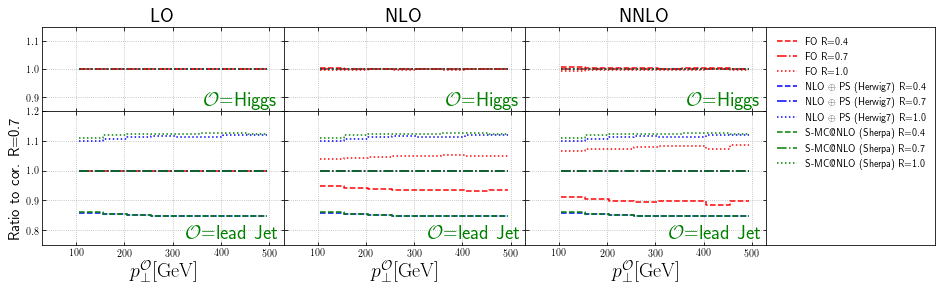

In [7]:
#This needs to be set by user:
ratiotoHiggs  =np.array(NNLOJET_10_NLO['/LH2017_ZHJETS/XpT'].yVals()[:50])
ratiotoleadPT =np.array(NNLOJET_10_NLO['/LH2017_ZHJETS/J1_pT_R10'].yVals()[:50])

ratiotoleadPT1=np.array(NNLOJET_10_NLO['/LH2017_ZHJETS/J1_pT_R10'].yVals()[:50])
ratiotoleadPT2=np.array(NNLOJET_10_NLO['/LH2017_ZHJETS/J2_pT_R10'].yVals()[:50])
ratiotoleadPT3=np.array(NNLOJET_10_NLO['/LH2017_ZHJETS/J3_pT_R10'].yVals()[:50])
ratiotoinclJet=ratiotoleadPT1+ratiotoleadPT2+ratiotoleadPT3
ratioToR07=True
ratiototext="Ratio to cor. R=0.7"
savefig="Fig_V_18_Higgs.pdf"
multiplots(ratiotoHiggs,ratiotoleadPT,ratiotoinclJet,ratiototext,savefig)